# Object Oriented Programming 2 - examples and APIs


## Tasks Today:

   

1) <b>Shopping Cart Example</b> <br>
2) <b>Requests and the pokemon API </b> <br>
 

# Goal 
### build a shopping cart program with prices and quantities using objects and a dictionary

In [4]:
from IPython.display import clear_output as clear
# Create a class called cart that retains items and has methods to add, remove, and show
class Cart():
    def __init__(self):
        self.items = {}
        
    def add(self):
        clear()
        new_item = input('What do you want to get?')
        quantity = int(input(f'How many {new_item}s do you want?'))
        if new_item not in self.items.keys():
            self.items[new_item] = quantity
        else:
            self.items[new_item] += quantity
            print(f'{quantity} {new_item}s have been added to the cart')
    
    def remove(self):
        clear()
        discard = input("What would you like to discard?")
        quantity = int(input(f'How many {discard}s yould you like to put back'))
        try:
            self.items[discard] -= quantity
            if self.items[discard] <= 0:
                del self.items[discard]
            print(f'{quantity} {discard}s has been removed')
        except:
            print(f"{discard} was not in your cart")
            
        self.show()
        
    def show(self):
        print("Your cart conatins the items below")
        print("  Item  |  Quantity")
        for item, quantity in self.items.items():
            print(f"{item} | {quantity}")
            
    def checkout(self):
        clear()
        if not self.items:
            print('Please come back and buy things')
        else:
            print('Thanks for shopping')
            self.show()

class Main:
    def showInstructions(self):
        print("""
        Welping to the Shopping Program!
        Options:
        [1] Show the Current Cart
        [2] Add Item
        [3] Remove Item
        [4] Quit
        """)
    
    def run(self):  
        my_cart = Cart()
        
        while True:
            self.showInstructions()
            choice = input('What would you like to do?')
            if choice == '1':
                if my_cart.items:
                    my_cart.show()
                else:
                    print('Your Cart is Empty...')
            elif choice == '2':
                my_cart.add()
            elif choice == '3':
                if my_cart.items:
                    my_cart.remove()
                else:
                    print('Your Cart is Empty... How are you going to remove nothing?')
            elif choice == '4':
                my_cart.checkout()
                break
            else:
                print("Invalid Input.... Please select an option above")
                
my_prog = Main()
my_prog.run()

Please come back and buy things


# working with APis

<p> What exactly is an API? <br> <br>
API is the acronym for Application Programming Interface, which is a software intermediary that allows two applications to talk to each other. Each time you use an app like Facebook, send an instant message, or check the weather on your phone, you're using an API. </p>

### The Poke API  allows you to retreive a pokemon's information from PokeAPI https://pokeapi.co/



In [5]:
# making an API call
import requests

r = requests.get("https://pokeapi.co/api/v2/pokemon/luxray")
if r.status_code == 200:
    data = r.json()
else:
    print(f"Error Status Code: {r.status_code}")
print(data.keys())



dict_keys(['abilities', 'base_experience', 'forms', 'game_indices', 'height', 'held_items', 'id', 'is_default', 'location_area_encounters', 'moves', 'name', 'order', 'past_types', 'species', 'sprites', 'stats', 'types', 'weight'])


### Display a Pokemon's name, weight, abilities, and types

In [8]:
# get the name
name = data['name']
print(name)

luxray


In [9]:
# get types
types = [pokemon['type']['name'] for pokemon in data['types']]
print(types)

['electric']


In [10]:
# get weight
weight = data['weight']
print(weight)

420


In [11]:
# get abilities
abilities = [pokemon['ability']['name'] for pokemon in data['abilities']]
print(abilities)

['rivalry', 'intimidate', 'guts']


In [12]:
# Create a structure for a single pokemon
first_pokemon = {
    'name': '',
    'abilities':[],
    'weight': 0,
    'types':[]
}



NameError: name 'luxray' is not defined

In [13]:
luxray = {
    'name': name,
    'abilities': abilities,
    'weight': weight,
    'types': types
}

luxray

{'name': 'luxray',
 'abilities': ['rivalry', 'intimidate', 'guts'],
 'weight': 420,
 'types': ['electric']}

#### Create a function to Pull in your own Pokemon's data 

In [23]:
def poke_api_call(pokemon_name_or_id):
    r = requests.get(f"https://pokeapi.co/api/v2/pokemon/{pokemon_name_or_id}")
    if r.status_code == 200:
        data = r.json()
        
        name = data['name']
        types = [pokemon['type']['name'] for pokemon in data['types']]
        abilities = [poke['ability']['name'] for poke in data['abilities']]
        weight = data['weight']
        
        pokemon_x = {
            "name":name,
            "abilities":abilities,
            "weight":weight,
            "types":types
        }
        return pokemon_x
    else:
        print(f"Error Status Code: {r.status_code}")

shinx = poke_api_call("shinx")
shinx


{'name': 'shinx',
 'abilities': ['rivalry', 'intimidate', 'guts'],
 'weight': 95,
 'types': ['electric']}

Choose your pokemon

In [24]:
from random import randint
# Random number generated for each pokemon id
random_team = [randint(1,898) for i in range(6)]

your_team = ['electabuzz', 'haunter','tyranitar','blaziken','marowak','dragonair']


#### Use your function to create a dictionary of your Johto League 6  (favorite 6 pokemon)

In [26]:
# Place all 6 of your pokemon on the object below, each pokemon should have at least as much info as Pikachu did.
my_six_pokemon = {}


for member in random_team:
    poke_stats = poke_api_call(member)
    my_six_pokemon[member] = poke_stats
my_six_pokemon

{781: {'name': 'dhelmise',
  'abilities': ['steelworker'],
  'weight': 2100,
  'types': ['ghost', 'grass']},
 441: {'name': 'chatot',
  'abilities': ['keen-eye', 'tangled-feet', 'big-pecks'],
  'weight': 19,
  'types': ['normal', 'flying']},
 511: {'name': 'pansage',
  'abilities': ['gluttony', 'overgrow'],
  'weight': 105,
  'types': ['grass']},
 381: {'name': 'latios',
  'abilities': ['levitate'],
  'weight': 600,
  'types': ['dragon', 'psychic']},
 715: {'name': 'noivern',
  'abilities': ['frisk', 'infiltrator', 'telepathy'],
  'weight': 850,
  'types': ['flying', 'dragon']},
 803: {'name': 'poipole',
  'abilities': ['beast-boost'],
  'weight': 18,
  'types': ['poison']}}

## Lets create a class called 'Pokemon' and create our pokemon as instances

In [31]:
class Pokemon():
    def __init__ (self, name):
        self.name = name
        self.types = []
        self.abilities = []
        self.weight = 0
        self.poke_api_call()
        
    def poke_api_call(self):
        r = requests.get(f"https://pokeapi.co/api/v2/pokemon/{self.name}")
        if r.status_code == 200:
            data = r.json()
        
            self.name = data['name']
            self.types = [pokemon['type']['name'] for pokemon in data['types']]
            self.abilities = [poke['ability']['name'] for poke in data['abilities']]
            self.weight = data['weight']
    
        else:
            print(f"Error Status Code: {r.status_code}")
    #What happens when you print
    def __repr__(self):
        return f"You caught a {self.name}!"

### Let's Catch some Pokemon

In [32]:
pikachu = Pokemon('pikachu')

print(pikachu)
print(type(pikachu))
print(pikachu.__dict__)

You caught a pikachu!
<class '__main__.Pokemon'>
{'name': 'pikachu', 'types': ['electric'], 'abilities': ['static', 'lightning-rod'], 'weight': 60}


In [33]:
pokedex = {}
for member in random_team:
    pokeball = Pokemon(member)
    pokedex[member] = pokeball
pokedex

{781: You caught a dhelmise!,
 441: You caught a chatot!,
 511: You caught a pansage!,
 381: You caught a latios!,
 715: You caught a noivern!,
 803: You caught a poipole!}

## Exercise 1:

### Create a Method prints an image of your pokemon

<p>HINT: You may need another attribute as well to store your image url within. </p>

In [67]:
# Display an image in Jupyter notebook
from IPython.display import Image


class Pokemon(Evolver):
    def __init__ (self, name):
        self.name = name
        self.types = []
        self.abilities = []
        self.weight = 0
        self.id = 0
        self.poke_api_call()
        self.picture()
        print(self)
        
    def poke_api_call(self):
        r = requests.get(f"https://pokeapi.co/api/v2/pokemon/{self.name}")
        if r.status_code == 200:
            data = r.json()
        
            self.name = data['name']
            self.types = [pokemon['type']['name'] for pokemon in data['types']]
            self.abilities = [poke['ability']['name'] for poke in data['abilities']]
            self.weight = data['weight']
            self.id = data['id']
    
        else:
            print(f"Error Status Code: {r.status_code}")
    #What happens when you print
    def __repr__(self):
        return f"You caught a {self.name}!"
    
    def picture(self):
        display(Image(f'https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/other/official-artwork/{self.id}.png', width = 300))

In [16]:
for member in random_team:
    

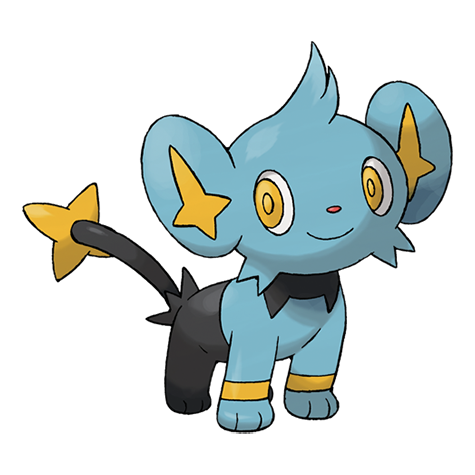

You caught a shinx!


In [68]:
test = Pokemon('shinx')


In [71]:
# Calling our new method
test.evolve()

You can't evolve your luxray anymore.


## Exercise 2:

### Create a Method that evolves your Pokemon
If your pokemon can't evolve any further print a message that says "\<name of pokemon> can't evolve."

In [66]:
#Mixins
from time import sleep

class Evolver:
    
    def evolve(self):
        # API call to pokemon-species endpoint
        r = requests.get(f'https://pokeapi.co/api/v2/pokemon-species/{self.name}')
        if r.status_code != 200:
            print(f"Species Status : {r.status_code}")
            return
        else:
            pokemon_species = r.json()
            
        r2 = requests.get(pokemon_species['evolution_chain']['url'])
        if r2.status_code != 200:
            print(f"Evolution Chain Error : {r2.status_code}")
            return
        else:
            ev_chain = r2.json()
            ev_chain = ev_chain['chain']
            
        #First Evolution    
        base_name = ev_chain['species']['name']
            
        evolution = ev_chain["evolves_to"][0]
        
        #form 2
        evolution_name = evolution['species']['name']
            
        if base_name == self.name:
            pass
        elif evolution_name == self.name:
            evolution_name = evolution['evolves_to'][0]['species']['name']
        else:
            print(f"You can't evolve your {self.name} anymore.")
            return
        
        print("......")
        sleep(1)
        print(f"Your {self.name} is evolving?!")
        self.picture()
        sleep(1)
        print(".........")
        self.name = evolution_name
        self.poke_api_call()
        self.picture()

Now let's evolve a few

In [94]:
class Pokemon(Evolver, Move_Tutor):
    def __init__ (self, name):
        self.name = name
        self.types = []
        self.abilities = []
        self.weight = 0
        self.id = 0
        self.poke_api_call()
        self.picture()
        print(self)
        super().__init__()
        
    def poke_api_call(self):
        r = requests.get(f"https://pokeapi.co/api/v2/pokemon/{self.name}")
        if r.status_code == 200:
            data = r.json()
        
            self.name = data['name']
            self.types = [pokemon['type']['name'] for pokemon in data['types']]
            self.abilities = [poke['ability']['name'] for poke in data['abilities']]
            self.weight = data['weight']
            self.id = data['id']
    
        else:
            print(f"Error Status Code: {r.status_code}")
    #What happens when you print
    def __repr__(self):
        return f"You caught a {self.name}!"
    
    def picture(self):
        display(Image(f'https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/other/official-artwork/{self.id}.png', width = 300))

#  Final Exercise: <br> <br>Create a Move_Tutor Class that will allow the Pokemon Class to inherit a move list.
<br>
<p>for an added bonus you can make sure that if a pokemon has 4 moves the user can choose one of them to replace with a new move. </p>

In [93]:
class Move_Tutor:
    def __init__(self):
        self.move_list = []
        
    def teach_moves(self):
        
        new_move = input(f"What move do you want {self.name} to learn? ")
        
        if (len(self.move_list) >= 4):
            print(f"Uh Oh! It seems your {self.name} already knows four moves. In order to learn {new_move}, they will need to forget another one.")
            cont = input(f"Do you wish for your {self.name} to forget a move? if so, enter 'forget', otherwise, enter anything else ")
            if cont == cont.lower() == 'forget':
                while True:
                    print (f"\n1:{self.move_list[0]} \n2:{self.move_list[1]} \n3:{self.move_list[2]} \n4:{self.move_list[3]}")
                    choice = input(f'Please enter the number next to whichever move you want {self.name} to forget')
                    
                    if choice == '1':
                        print('.....')
                        sleep(1)
                        print(f"{self.name} has forgotten {self.move_list[0]}.")
                        del self.move_list[0]
                        break
                    
                    elif choice == '2':
                        print('.....')
                        sleep(1)
                        print(f"{self.name} has forgotten {self.move_list[1]}.")
                        del self.move_list[1]
                        break
                    
                    elif choice == '3':
                        print('.....')
                        sleep(1)
                        print(f"{self.name} has forgotten {self.move_list[2]}.")
                        del self.move_list[2]
                        break
                        
                    elif choice == '4':
                        print('.....')
                        sleep(1)
                        print(f"{self.name} has forgotten {self.move_list[3]}.")
                        del self.move_list[3]
                        break
                    
                    else:
                        print("You did not enter one of the valid numbers, please try again")
                        sleep(1)
                        
        self.move_list.append(new_move)
        print("...")
        sleep(1)
        print(".....")
        sleep(1)
        print(".......")
        sleep(1)
        print(f"Congratulations! Your {self.name} has learned {new_move}")
        
    def show_moves(self):
        i = 1
        for move in self.move_list:
            print (f"{i}\t{move}")
            i+=1
        
        

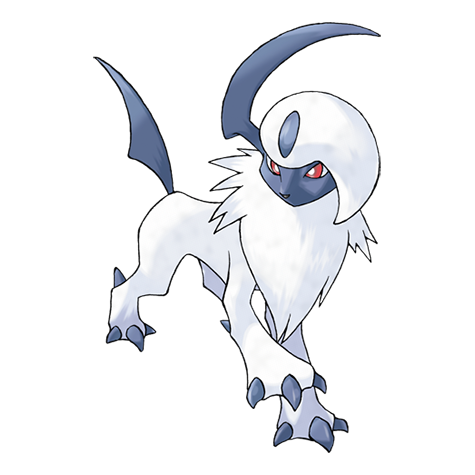

You caught a absol!


In [95]:
absol = Pokemon('absol')

In [100]:
absol.teach_moves()


What move do you want absol to learn? agility
Uh Oh! It seems your absol already knows four moves. In order to learn agility, they will need to forget another one.
Do you wish for your absol to forget a move? if so, enter 'forget', otherwise, enter anything else forget

1:crunch 
2:pursuit 
3:extreme speed 
4:slash
Please enter the number next to whichever move you want absol to forget4
.....
absol has forgotten slash.
...
.....
.......
Congratulations! Your absol has learned agility


In [101]:
absol.show_moves()

1	crunch
2	pursuit
3	extreme speed
4	agility
